In [2]:
import pandas as pd
import numpy as np

# 1. Data Understanding and Preparation:

### A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables.

In [3]:
# load the datasets into pandas dataframes
data1 = pd.read_csv('Data1.csv')
data2 = pd.read_csv('Data2.csv')

In [7]:
data1.head(3)
data2.head(3)

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN


### B. Print shape and Column Names and DataTypes of both the Dataframes.

In [12]:
# print the dimensions and column names of both dataframes
print("Data1 shape:", data1.shape)
print("----------------------- \n")
print("Data1 columns:", data1.columns)
print("----------------------- \n")
print("Data1 data types:", data1.dtypes)

Data1 shape: (5000, 8)
----------------------- 

Data1 columns: Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')
----------------------- 

Data1 data types: ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object


In [11]:
print("Data2 shape:", data2.shape)
print("----------------------- \n")
print("Data2 columns:", data2.columns)
print("----------------------- \n")
print("Data2 data types:", data2.dtypes)

Data2 shape: (5000, 7)
----------------------- 

Data2 columns: Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')
----------------------- 

Data2 data types: ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


### C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

In [38]:
# merge both dataframes on the 'ID' feature
merged_data = pd.merge(data1, data2, on='ID')

# verify the merged dataframe
print(merged_data.head())

   ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  
1                0           0         NaN  
2                0           

### D. Change Datatype of below features to ‘Object’ ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.

In [39]:
# convert selected columns to 'object' data type
cols_to_convert = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']
merged_data[cols_to_convert] = merged_data[cols_to_convert].astype('object')

In [40]:
merged_data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

In [41]:
merged_data.head(10)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
5,6,37,13,29,92121,4,0.4,2,155,0,0,1,0,NaN
6,7,53,27,72,91711,2,1.5,2,0,0,0,1,0,NaN
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,1,NaN
8,9,35,10,81,90089,3,0.6,2,104,0,0,1,0,NaN
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0


# 2. Data Exploration and Analysis:

### A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights (5Marks)

In [18]:
import matplotlib.pyplot as plt

In [55]:
merged_data['LoanOnCard'].shape

(5000,)

In [54]:
null_count = merged_data['LoanOnCard'].isnull().sum()
print(f"There are total of {null_count} null records in LoanOnCard column")

There are total of 20 null records in LoanOnCard column


In [53]:
no_loan = len(merged_data[merged_data['LoanOnCard']==0])
loan = len(merged_data[merged_data['LoanOnCard']==1])
print(f"{loan} users have taken loan")
print(f"{no_loan} users haven't taken loan")


480 users have taken loan
4500 users haven't taken loan


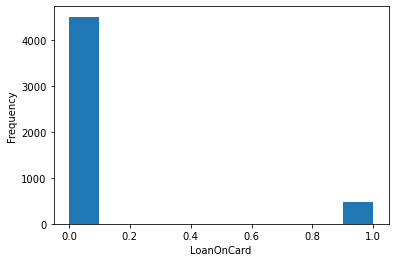

In [19]:
plt.hist(merged_data['LoanOnCard'], bins=10)
plt.xlabel('LoanOnCard')
plt.ylabel('Frequency')
plt.show()

### Insights
* There are a total of 5000 observations
* 480 users have taken loan
* 4500 users haven't taken loan
* 'LoanOnCard' column has 20 null records

### B. Check the percentage of missing values and impute if required

In [62]:
merged_data.isna().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [64]:
missing_val = (20/5000)*100
print(f"The percentage to missing values is {missing_val}%")

The percentage to missing values is 0.4%


### This is a really small percentage of missing values. Moreoever, trying to fill mean, min, max or median values for Loan on card does not make logical sense. Therefore, the rows with missing values are dopped

In [72]:
merged_data.dropna(inplace=True)
merged_data.isna().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

### C. Check for unexpected values in each categorical variable and impute with best suitable value

In [77]:
temporary = merged_data.select_dtypes(include='object')
temporary.describe()

,HiddenScore,Level,Security,FixedDepositAccount,InternetBanking,CreditCard
count,4980,4980,4980,4980,4980,4980
unique,4,3,2,2,2,2
top,1,1,0,0,1,0
freq,1466,2089,4460,4678,2974,3514


In [80]:
temporary['HiddenScore'].unique()

array([1, 4, 3, 2], dtype=object)

In [81]:
temporary['Level'].unique()


array([3, 2, 1], dtype=object)

In [82]:
temporary['Security'].unique()

array([0, 1], dtype=object)

### Inference: nothing unsual was found in the categorical vairables

# 3. DataPreparationandmodelbuilding:

### A. Split data into X and Y [Recommended to drop ID & ZipCode. LoanOnCard is target Variable]
### B. Split data into train and test. Keep 25% data reserved for testing
### C. Train a Supervised Learning Classification base model - Logistic Regression D. Print evaluation metrics for the model and clearly share insights

In [83]:
# Dropping ID and ZipCode columns
final_data = merged_data.drop(['ID', 'ZipCode'], axis=1)

# Separating X and Y
X = final_data.drop('LoanOnCard', axis=1)
Y = final_data['LoanOnCard']

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [93]:
logreg = LogisticRegression(max_iter=1000)

In [94]:
# fit the model on the training data
logreg.fit(X_train, y_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [102]:
accuracy_score = logreg.score(X_test, y_test)
print(f"The accuracy score of the model is {round(accuracy_score*100, 3)}%")

The accuracy score of the model is 94.699%


In [103]:
y_pred = logreg.predict(X_test)
precision = precision_score(y_test, y_pred)
print(f"The precision score of the model is {round(precision*100, 3)}%")

The precision score of the model is 77.419%


### Model Evaluation
* The accuracy score of the model is 94.699%
* The precision score of the model is 77.419%